# Distillation

### Binary distillation assuming 100% separation on non-keys

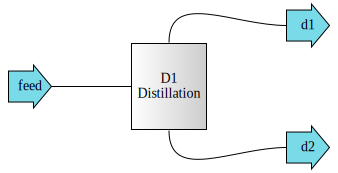

Distillation: D1
ins...
[0] feed
    phase: 'l', T: 76.129 degC, P: 1 atm
    flow (kmol/hr): Water     80
                    Methanol  100
                    Glycerol  25
outs...
[0] d1
    phase: 'g', T: 64.91 degC, P: 1 atm
    flow (kmol/hr): Water     1
                    Methanol  99.2
[1] d2
    phase: 'l', T: 100.06 degC, P: 1 atm
    flow (kmol/hr): Water     79
                    Methanol  0.798
                    Glycerol  25


In [1]:
from biosteam import Species, Stream, Distillation

# Set up stream
Stream.species = Species('Water', 'Methanol', 'Glycerol')
feed = Stream('feed', flow=(80, 100, 25))
feed.T = feed.bubble_point()[0] # For better operation

# Set up column
D1 = Distillation('D1', ins=feed,
                  LHK=('Methanol', 'Water'),
                  y_top=0.99, x_bot=0.01, k=1.1)
D1.simulate()

# See all results
D1.diagram()
D1.show(T='degC', P='atm', in_fractions= True)

In [2]:
print(D1.results.table())

Distillation               Units        D1
Operation:                                
  Theoretical feed stage       #         6
  Theoretical stages           #        27
  Minimum reflux           Ratio     0.687
  Reflux                   Ratio     0.756
  T_condenser                  K       338
  T_boiler                     K       373
  Cooling                  kJ/hr -2.86e+06
  Heating                  kJ/hr  6.58e+06
Design:                                   
  Rectifier stages             #        19
  Stripper stages              #        40
  Actual stages                #        59
  Height                      ft      98.1
  Diameter                    ft      3.36
  Wall thickness              in     0.875
  Weight                      lb  3.89e+04
Cost:                                     
  Trays                      USD  4.47e+04
  Tower                      USD  2.22e+05
  Condenser                  USD  2.11e+04
  Boiler                     USD  1.95e+04
Summary:   

In [3]:
D1.heat_utilities[0].results.units['Cost'] = 'USD/yr'
for hu in D1.heat_utilities:
    hu.show()

HeatUtility: Cooling water
 Duty:-2.86e+06 kJ/hr
 Flow: 3.53e+04 kg/hr
 Cost: 8.37e+03 USD/yr
HeatUtility: Low pressure steam
 Duty: 6.58e+06 kJ/hr
 Flow: 3.03e+03 kg/hr
 Cost: 3.5e+05 USD/yr
